In [1]:

from bleach import clean
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as mp 
from matplotlib.pyplot import subplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import r2_score, accuracy_score
from sklearn.linear_model import SGDClassifier
from sqlalchemy.sql import label

In [2]:
data = pd.read_csv('co2_emissions_data.csv')

print(data.shape)
cleaned = data.dropna()
cleaned= cleaned.drop_duplicates()
print(cleaned.shape)

(7385, 13)
(6282, 13)


In [3]:
cleaned.drop(columns=['Fuel Consumption Comb (mpg)'], inplace=True)
cleaned

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Emission Class
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196,MODERATE
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221,HIGH
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136,MODERATE
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255,HIGH
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,219,HIGH
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,232,HIGH
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,240,HIGH
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,232,HIGH


In [4]:
numerical=['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
           'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']

numericalFeatures=['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                  'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']

nonNumerical=['Make','Model','Vehicle Class','Transmission','Fuel Type','Emission Class']


In [5]:
print(cleaned[numericalFeatures].describe())

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     6282.000000  6282.000000                       6282.000000   
mean         3.161812     5.618911                         12.610220   
std          1.365201     1.846250                          3.553066   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.700000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  
count                      6282.000000                       6282.000000  
mean                          9.070583                         11.017876  
std                           2.278884                          2.946876  
min                           4.000000             

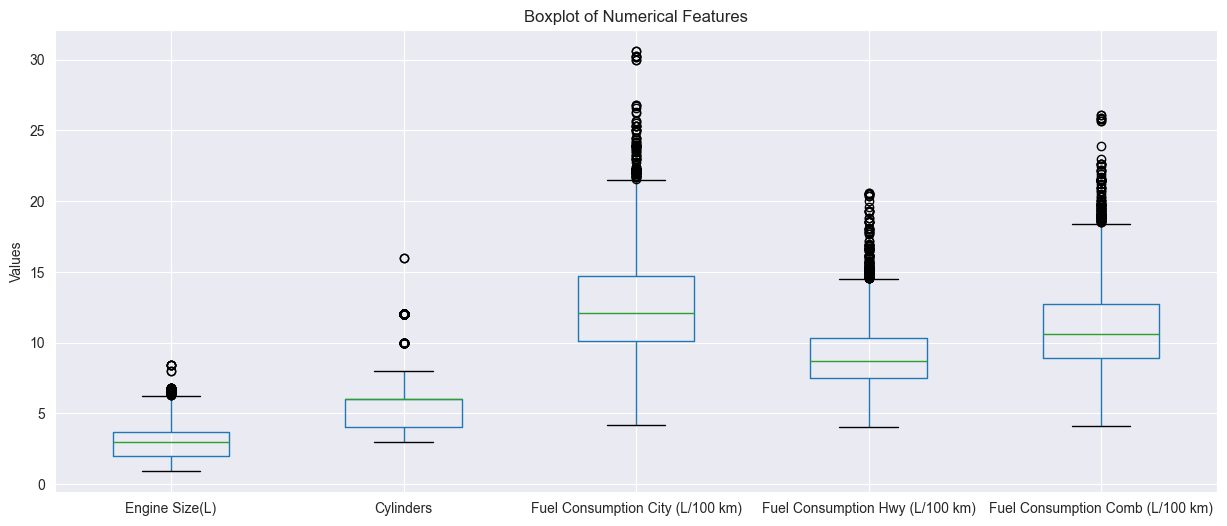

In [6]:
cleaned[numericalFeatures].boxplot(figsize=(15, 6))
mp.title("Boxplot of Numerical Features")
mp.ylabel("Values")
mp.show()

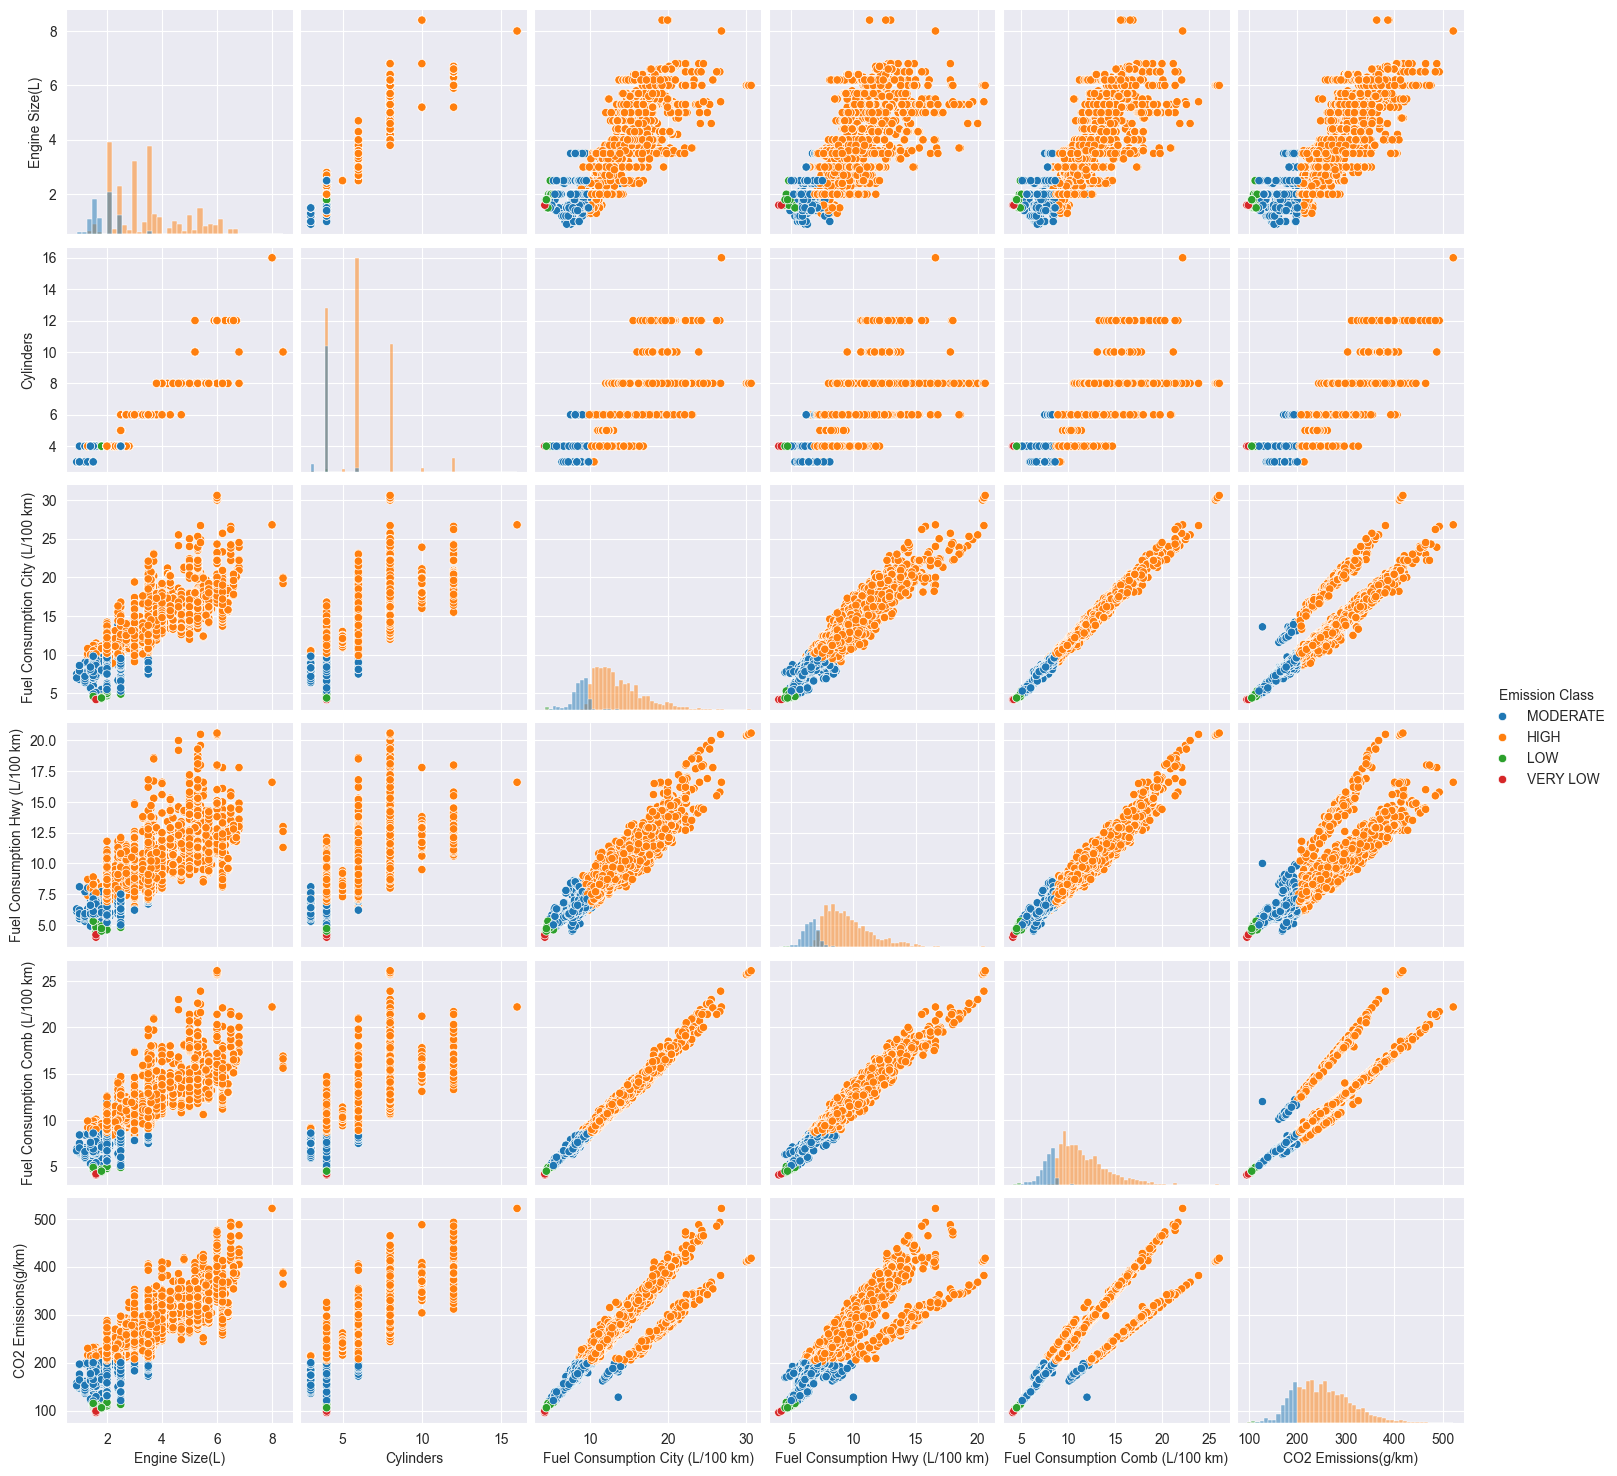

In [7]:
sns.pairplot(cleaned,diag_kind='hist',hue='Emission Class')
mp.show()


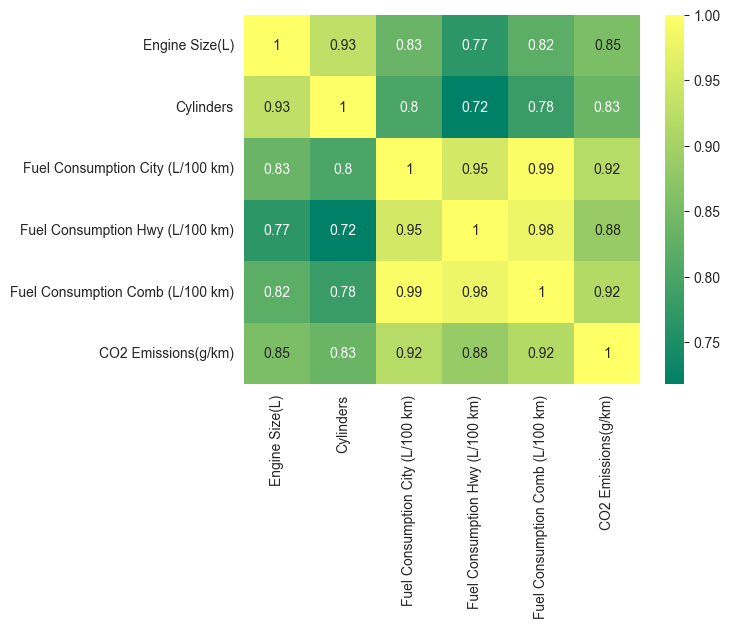

In [38]:
sns.heatmap(cleaned[numerical].corr(), annot=True,cmap='summer')
mp.show()

In [39]:
from sklearn.preprocessing import LabelEncoder

toEncoded=['Transmission','Fuel Type','Emission Class']

for col in toEncoded:
    cleaned[col] = LabelEncoder().fit_transform(cleaned[col])
cleaned
# result = cleaned[cleaned['Emission Class']==3]
# print(result)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Emission Class
0,ACURA,ILX,COMPACT,2.0,4,14,4,9.9,6.7,8.5,196,2
1,ACURA,ILX,COMPACT,2.4,4,25,4,11.2,7.7,9.6,221,0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,22,4,6.0,5.8,5.9,136,2
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,15,4,12.7,9.1,11.1,255,0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,15,4,12.1,8.7,10.6,244,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,17,4,10.7,7.7,9.4,219,0
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,17,4,11.2,8.3,9.9,232,0
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,17,4,11.7,8.6,10.3,240,0
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,17,4,11.2,8.3,9.9,232,0


In [40]:
feature=['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                  'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']+toEncoded[0:2]
target=['CO2 Emissions(g/km)']+toEncoded[2:]
numericalTarget=['CO2 Emissions(g/km)']

nonNumericalFeatures=['Transmission','Fuel Type']

x=cleaned[feature]
y=cleaned[target]

x, y = shuffle(x, y, random_state=42)

# print(target[1])
x
# y

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Transmission,Fuel Type
3003,3.0,6,13.6,10.0,12.0,16,0
5970,3.0,6,11.9,8.5,10.4,17,4
2394,3.6,6,14.8,10.4,12.8,15,3
6020,3.6,6,12.9,10.2,11.7,5,3
3416,3.0,6,11.8,8.9,10.5,9,4
...,...,...,...,...,...,...,...
4032,2.5,4,9.6,7.0,8.4,25,3
5892,1.5,4,8.4,6.2,7.4,25,4
5929,2.0,4,9.8,7.4,8.7,25,3
6122,2.0,4,8.8,7.0,8.0,25,3


In [41]:
input=['Engine Size(L)','Fuel Consumption Comb (L/100 km)']
output=['CO2 Emissions(g/km)']


In [42]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_num=x_train[numericalFeatures]
x_train_str=x_train[nonNumericalFeatures]
x_test_num=x_test[numericalFeatures]
x_test_str=x_test[nonNumericalFeatures]
print(x_train_num)
print(x_train_str)
y_train_class=y_train[target[1]]
y_test_class=y_test[target[1]]
y_test=y_test[numericalTarget]
y_train=y_train[numericalTarget]

# print(max(y_test_class))

      Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
3262             1.8          4                               9.7   
4167             1.6          4                               9.0   
5219             2.4          4                              10.3   
4208             3.0          6                              10.9   
903              2.7          6                              11.5   
...              ...        ...                               ...   
1493             1.5          4                               9.9   
7289             6.6         12                              20.4   
2358             1.4          4                               9.5   
4418             2.5          5                              12.4   
1056             2.0          4                              13.6   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  
3262                              7.5                               8.7  
4167                   

In [43]:
scaler_x = MinMaxScaler()

scaled_x_train = scaler_x.fit_transform(x_train_num)

scaled_x_test = scaler_x.transform(x_test_num)

x_train_scaled_df=pd.DataFrame(scaled_x_train)
x_test_scaled_df=pd.DataFrame(scaled_x_test)

x_train_input=x_train_scaled_df.iloc[:, [0, 4]]
x_test_input=x_test_scaled_df.iloc[:, [0, 4]]

print(x_train_input)
print(x_test_input)
print(x_train_scaled_df)
print(y_train.to_numpy().shape)
# print(x_train)
# print(y_test)
print(y_test_class.shape)
print(y_train_class.shape)

             0         4
0     0.120000  0.209091
1     0.093333  0.195455
2     0.200000  0.240909
3     0.280000  0.263636
4     0.240000  0.263636
...        ...       ...
5020  0.080000  0.195455
5021  0.760000  0.590909
5022  0.066667  0.200000
5023  0.213333  0.290909
5024  0.146667  0.340909

[5025 rows x 2 columns]
             0         4
0     0.680000  0.540909
1     0.200000  0.259091
2     0.733333  0.404545
3     0.640000  0.554545
4     0.280000  0.304545
...        ...       ...
1252  0.280000  0.254545
1253  0.280000  0.354545
1254  0.280000  0.331818
1255  0.453333  0.590909
1256  0.146667  0.245455

[1257 rows x 2 columns]
             0         1         2         3         4
0     0.120000  0.076923  0.208333  0.210843  0.209091
1     0.093333  0.076923  0.181818  0.216867  0.195455
2     0.200000  0.076923  0.231061  0.259036  0.240909
3     0.280000  0.230769  0.253788  0.271084  0.263636
4     0.240000  0.230769  0.276515  0.234940  0.263636
...        ...      

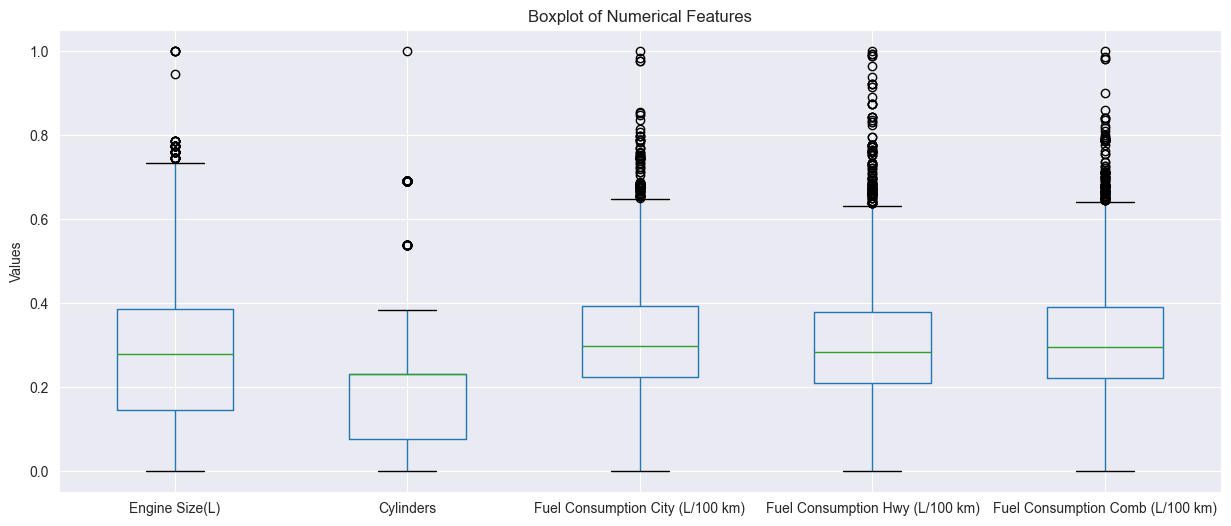

In [44]:
x_train_df = pd.DataFrame(scaled_x_train, columns=numericalFeatures)
x_train_df.boxplot(figsize=(15, 6))
mp.title("Boxplot of Numerical Features")
mp.ylabel("Values")
mp.show()

In [45]:
class LinearRegression():
    def __init__(self, alpha=0.01, max_iterations=1000):
        self.alpha = alpha
        self.max_iterations = max_iterations
        self.theta = None
        self.cost_history = []

    def hypothesis(self, x):
        hyp= (np.dot(x,self.theta))
        return hyp
        
    def cost_function(self,x,hyp,y):
        cost = (1/len(x)*(np.sum(np.pow(hyp - y, 2))))
        return cost
    
    def gradient(self,x,y):
         m, n = x.shape
         self.theta = np.zeros(n)
         for i in range(self.max_iterations):
             h=self.hypothesis(x)
             for j in range(len(self.theta)):
                 part= 1/m * sum( (h-y) * x[:,j] )
                 self.theta[j] = self.theta[j] - self.alpha *part 
             cost=self.cost_function(x,h,y)
             self.cost_history.append(cost)
         return self.theta
    
    def fit(self, x, y):
        x = np.c_[np.ones((x.shape[0], 1)), x] 
        y=y.to_numpy()
        y = y.flatten() 
        self.theta=self.gradient(x,y)
    
    def predict(self, x):   
         x = np.c_[np.ones((x.shape[0], 1)), x]
         return self.hypothesis(x)
    
    
    

In [69]:

# print(x_train_input.shape)
# print(x_test_input.shape)
# print(y_train.shape)
# print(y_test.shape)

max_iterations=10000
learning_rate=0.001

model = LinearRegression(max_iterations=max_iterations,alpha=learning_rate)

model.fit(x_train_input, y_train)

predictions = model.predict(x_test_input)  
print('--------------') 
print(f'predictions: {predictions}')
print('--------------')

# test_predictions = model.predict(x_test_input)

r2 = r2_score(y_test, predictions)

print(f"R² score: {r2}")


--------------
predictions: [316.19741617 236.64547975 308.01785424 ... 252.51844896 297.21335172
 229.60051217]
--------------
R² score: 0.7012578880434586


In [65]:
print(model.theta)

[189.12011727 106.14223945 101.49686333]


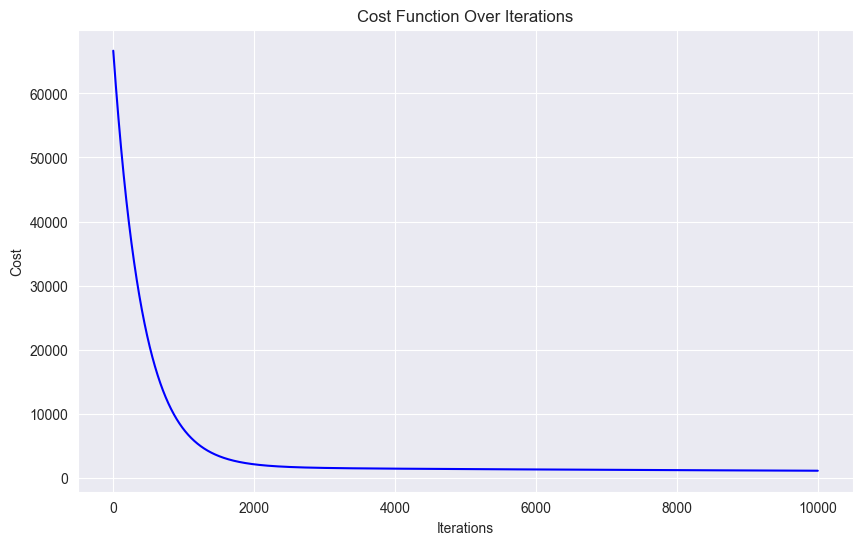

In [66]:
mp.figure(figsize=(10, 6))
mp.plot(model.cost_history, color="blue")
mp.xlabel("Iterations")
mp.ylabel("Cost")
mp.title("Cost Function Over Iterations")
mp.grid(True)
mp.show()

In [67]:

model = SGDClassifier(max_iter=1000 ,alpha=0.001,random_state=42)

model.fit(x_train_input, y_train_class)
y_pred = model.predict(x_test_input)

accuracy = accuracy_score(y_test_class, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy * 100:.2f}%")

Accuracy of the Logistic Regression model: 93.95%
